# Iris Flower Classification Problem


Have you ever heard of the Iris flower dataset? It is one of the most well-known datasets in the world of machine learning and data science, and for good reason. It consists of 150 records of Iris flowers, including information about their sepal and petal length and width, as well as the type of Iris flower.

The Iris genus entails about 300 species, but our program will only classify the following three:

    Iris setosa
    Iris virginica
    Iris versicolor
    

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data
ds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iris.csv')

In [4]:
#print the top 10 of the head of the data
ds.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [12]:
# Seperate the X and the Y variable.
# Y is the variety of the iris flowers

# return dataframe includes all rows and all columns except the last one
X = ds.iloc[:,:-1]

# return dataframe includes all rows in last column
Y = ds.iloc[:,-1]



In [13]:
#print the x and y for inspection purposes

print (X)
print(Y)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object


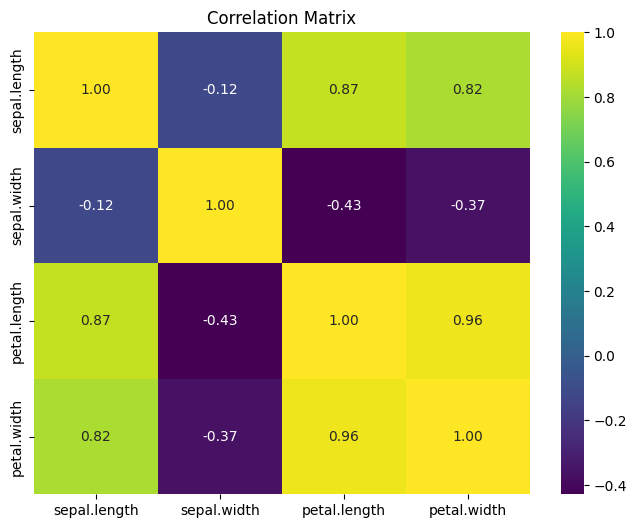

In [14]:
# Correlation matrix
numerical_ds = ds.iloc[:,:-1]
correlation_matrix = numerical_ds.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [15]:
# Split the data to train and test dataset.
# the testing is 30%

from sklearn.model_selection import train_test_split
# X is eature set, Y is target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [16]:
# Feature Scaling for X variables

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

In [11]:
#print the x_train and y_train for inspection purposes

# Print X_train
print(X_train)

# Print Y_train
print(Y_train)



[[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
 [ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]
 [ 0.91296121 -0.02284379  0.30909579  0.2177459 ]
 [ 1.63643991  1.41631528  1.30142668  1.70589097]
 [-0.17225683 -0.26270364  0.19235097  0.08245999]
 [ 2.11875905 -0.02284379  1.59328871  1.16474731]
 [-0.29283662 -0.02284379  0.36746819  0.35303182]
 [-0.89573553  1.17645543 -1.44207638 -1.40568508]
 [ 2.23933883 -0.50256349  1.65166111  1.0294614 ]
 [-0.05167705 -0.74242333  0.13397857 -0.32339776]
 [-0.77515575  0.93659559 -1.44207638 -1.40568508]
 [-1.01631531  1.17645543 -1.50044878 -1.27039917]
 [-0.89573553  1.89603497 -1.15021435 -1.13511325]
 [-1.01631531 -2.42144225 -0.21625586 -0.32339776]
 [ 0.55122187 -0.74242333  0.60095781  0.75888956]
 [-1.25747488  0.93659559 -1.15021435 -1.40568508]
 [-1.01631531 -0.02284379 -1.32533157 -1.40568508]
 [-0.89573553  0.69673574 -1.26695916 -0.99982734]
 [-0.29283662 -0.74242333  0.19

# Use Random Forest model

Build a Random Forest Classifier Model with <b>n_estimator of 100</b> and <b>criterion of entropy</b>.
<div>
    The random forest classifier model object is name as <b>RF_classifier</b>
</div>

In [17]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance with n_estimators=100 and criterion='entropy'
RF_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Fit the model to the training data
RF_classifier.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', random_state=42)

In [18]:
#Predict the X_test
Y_pred = RF_classifier.predict(X_test)

In [21]:
#Print the y_test and y_pred

print("The original Y_test are : ")
print(Y_test)
print()

print("The precited Y_test based on Random Forest model are : ")
print(Y_pred)


The original Y_test are : 
114     Virginica
62     Versicolor
33         Setosa
107     Virginica
7          Setosa
100     Virginica
40         Setosa
86     Versicolor
76     Versicolor
71     Versicolor
134     Virginica
51     Versicolor
73     Versicolor
54     Versicolor
63     Versicolor
37         Setosa
78     Versicolor
90     Versicolor
45         Setosa
16         Setosa
121     Virginica
66     Versicolor
24         Setosa
8          Setosa
126     Virginica
22         Setosa
44         Setosa
97     Versicolor
93     Versicolor
26         Setosa
137     Virginica
84     Versicolor
27         Setosa
127     Virginica
132     Virginica
59     Versicolor
18         Setosa
83     Versicolor
61     Versicolor
92     Versicolor
112     Virginica
2          Setosa
141     Virginica
43         Setosa
10         Setosa
Name: variety, dtype: object

The precited Y_test based on Random Forest model are : 
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa'

In [22]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [23]:
# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [24]:
#Predict the type of new iris flower where
#sepal length is 6.5, sepal width is 3.8, petal length is 6.0 and petal width is 2.0

# Create a new observation
new_observation = [[6.5, 3.8, 6.0, 2.0]]

# Scale the new observation
new_observation_scaled = scaler.transform(new_observation)

# Use the trained model to predict the type of the new iris flower
new_prediction = RF_classifier.predict(new_observation_scaled)

print("The predicted type of the new iris flower is: ", new_prediction)



The predicted type of the new iris flower is:  ['Virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Use Logistic Regression model

In [25]:
#Build Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state=0)
LR_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [27]:
#Predict the X_test
Y_pred = LR_classifier.predict(X_test)

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [29]:
# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [30]:
#Predict the type of new iris flower where
#sepal length is 6.5, sepal width is 3.8, petal length is 6.0 and petal width is 2.0

# Create a new observation
new_observation = [[6.5, 3.8, 6.0, 2.0]]

# Scale the new observation
new_observation_scaled = scaler.transform(new_observation)

# Use the trained model to predict the type of the new iris flower
new_prediction = LR_classifier.predict(new_observation_scaled)

print("The predicted type of the new iris flower is: ", new_prediction)


The predicted type of the new iris flower is:  ['Virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Use KNN model

Build a KNN Classifier Model with <b> number of neighbor is 7</b>
<div>
    The random forest classifier model object is name as <b>KNN_classifier</b>, metric is <b>miskowski</b> and <b>p=2</b>
</div>

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
KNN_classifier = KNN_classifier.fit(X_train,Y_train)

In [32]:
#Predict the X_test
Y_pred = KNN_classifier.predict(X_test)

In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [34]:
# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [35]:
#Predict the type of new iris flower where
#sepal length is 6.5, sepal width is 3.8, petal length is 6.0 and petal width is 2.0

# Create a new observation
new_observation = [[6.5, 3.8, 6.0, 2.0]]

# Scale the new observation
new_observation_scaled = scaler.transform(new_observation)

# Use the trained model to predict the type of the new iris flower
new_prediction = KNN_classifier.predict(new_observation_scaled)

print("The predicted type of the new iris flower is: ", new_prediction)


The predicted type of the new iris flower is:  ['Virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
